In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("LoanExport.csv")
data.head()

<ipython-input-2-bcc3615a4011>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("LoanExport.csv")


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [ ]:
data.shape

(291451, 28)

In [ ]:
#data.info()

In [ ]:
df = data.drop(["FirstPaymentDate", "MSA", "MaturityDate", "PostalCode", "LoanSeqNum", "Channel", "ServicerName", "SellerName","ProductType","MonthsDelinquent","MonthsInRepayment"],axis=1)
df = df[df["CreditScore"] != 0] # drop CreditScore = 0

In [ ]:
#View description of all of our features
cols = df.describe(include='all')
#cols

In [ ]:
df["EverDelinquent"].value_counts()

0    232924
1     57338
Name: EverDelinquent, dtype: int64

In [ ]:
df['NumBorrowers'].unique()
# X  means unknown value

array(['2', '1', 'X '], dtype=object)

In [ ]:
df = df[df['NumBorrowers'] != 'X '] #drop 'NumBorrowers' = X

In [ ]:
df['FirstTimeHomebuyer'].unique()
# N:No, X:Unknown value, Y:Yes

array(['N', 'X', 'Y'], dtype=object)

In [ ]:
#Convert categorical data to numerical data (dummy variable)
#FirstTimeHomebuyer
df = df[df['FirstTimeHomebuyer'] != 'X']
df['FirstTimeHomebuyer'] = np.where(df['FirstTimeHomebuyer'] == 'Y', 1, 0)

In [ ]:
df.FirstTimeHomebuyer.unique() #1:yes

array([0, 1])

In [ ]:
df['PPM'].unique()

array(['N', 'Y', 'X'], dtype=object)

In [ ]:
#PPM
df = df[df['PPM'] != 'X']
df['PPM'] = np.where(df['PPM'] == 'Y', 1, 0)
df.PPM.unique()

<ipython-input-14-0dab65607977>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PPM'] = np.where(df['PPM'] == 'Y', 1, 0)


array([0, 1])

In [ ]:
#Occupancy
mapping_dict1 = {'I': 1, 'O': 2, 'S': 3}
df['Occupancy'] = df['Occupancy'].replace(mapping_dict1)
df.Occupancy.unique()

array([2, 3, 1])

In [ ]:
#LoanPurpose
mapping_dict = {'C': 1, 'N': 2, 'P': 3}
df['LoanPurpose'] = df['LoanPurpose'].replace(mapping_dict)
df.LoanPurpose.unique()

array([1, 2, 3])

In [ ]:
df.PropertyType.unique()

array(['SF', 'PU', 'CO', 'CP', 'MH', 'LH', 'X '], dtype=object)

In [ ]:
#PropertyType
df = df[df['PropertyType'] != 'X ']
mapping_dict3 = {'SF':1, 'PU':2, 'CO':3, 'CP':4, 'MH':5, 'LH':6}
df['PropertyType'] = df['PropertyType'].replace(mapping_dict3)
df.PropertyType.unique()

array([1, 2, 3, 4, 5, 6])

In [ ]:
#PropertyState
df.PropertyState.unique()

array(['MI', 'GA', 'FL', 'CA', 'CT', 'WA', 'PR', 'DC', 'CO', 'KY', 'OH',
       'NC', 'IL', 'TX', 'PA', 'NJ', 'IN', 'ID', 'MA', 'AZ', 'MO', 'WI',
       'MN', 'WV', 'MD', 'NV', 'OR', 'NY', 'VA', 'SD', 'UT', 'NH', 'VT',
       'AR', 'IA', 'SC', 'AL', 'LA', 'HI', 'RI', 'MT', 'NM', 'KS', 'DE',
       'TN', 'MS', 'OK', 'ND', 'ME', 'AK', 'WY', 'NE', 'GU'], dtype=object)

In [ ]:
le = LabelEncoder()
df['PropertyState'] = le.fit_transform(df['PropertyState'])

In [ ]:
df.PropertyState.unique()

array([23, 10,  9,  4,  6, 49, 40,  7,  5, 18, 36, 28, 15, 45, 39, 32, 16,
       14, 20,  3, 25, 50, 24, 51, 21, 34, 38, 35, 47, 43, 46, 31, 48,  2,
       13, 42,  1, 19, 12, 41, 27, 33, 17,  8, 44, 26, 37, 29, 22,  0, 52,
       30, 11])

In [ ]:
# credit score >> score range
conditions = [(df['CreditScore']< 650),
             (df['CreditScore']>=650) & (df['CreditScore']<700),
             (df['CreditScore']>=700) & (df['CreditScore']<750),
             (df['CreditScore']>=750) & (df['CreditScore']<850)]

values = ['0','1','2','3'] #poor-fair-good-excellent

df['CreditRange'] = np.select(conditions,values)
df['CreditRange'].value_counts()

2    70837
3    56222
1    53022
0    27318
Name: CreditRange, dtype: int64

In [ ]:
#MIP
np.sort(df.MIP.unique())

array([ 0,  1,  4,  6,  7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37, 45, 47, 50, 52,
       55])

In [ ]:
conditions = [(df['MIP']< 20),
             (df['MIP']>=20) & (df['MIP']<40),
             (df['MIP']>=40) & (df['MIP']<56)]

values = ['0','1','2'] #low-med-high

df['MIP_Range'] = np.select(conditions,values)
df['MIP_Range'].value_counts()

0    135977
1     71404
2        18
Name: MIP_Range, dtype: int64

In [ ]:
#DTI
np.sort(df.DTI.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

In [ ]:
conditions = [(df['DTI']< 25),
             (df['DTI']>=25) & (df['DTI']<50),
             (df['DTI']>=50) & (df['DTI']<66)]

values = ['0','1','2']#low-med-high

df['DTI_Range'] = np.select(conditions,values)
df['DTI_Range'].value_counts()

1    140827
0     54084
2     12488
Name: DTI_Range, dtype: int64

In [ ]:
#LTV
np.sort(df.LTV.unique())

array([  0,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98, 100])

In [ ]:
conditions = [(df['LTV']<50),
             (df['LTV']>=50) & (df['LTV']<70),
             (df['LTV']>=70) & (df['LTV']<101)]

values = ['0','1','2']#low-med-high

df['LTV_Range'] = np.select(conditions,values)
df['LTV_Range'].value_counts()

2    163167
1     31380
0     12852
Name: LTV_Range, dtype: int64

In [ ]:
#OrigLoanTerm
np.sort(df.OrigLoanTerm.unique())

array([301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313,
       314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326,
       327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339,
       340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352,
       353, 354, 355, 356, 357, 358, 359, 360, 361])

In [ ]:
df['LoanTermYears'] = df['OrigLoanTerm'].apply(lambda x:math.trunc(x/12))
df['LoanTermYears'].value_counts()

30    205657
29       915
28       329
27       247
26       147
25       104
Name: LoanTermYears, dtype: int64

In [ ]:
#Units
np.sort(df.Units.unique())
df = df[df['Units'] != 0]

In [ ]:
df.head(10)

,CreditScore,FirstTimeHomebuyer,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,...,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,CreditRange,MIP_Range,DTI_Range,LTV_Range,LoanTermYears
1189,335,0,0,1,2,71,21,116000,71,6.875,...,1,1,360,2,0,0,0,0,2,30
1190,342,0,0,1,2,79,28,96000,79,6.875,...,2,2,360,1,1,0,0,1,2,30
1192,366,0,0,1,2,65,25,66000,65,6.625,...,1,1,360,2,0,0,0,1,1,30
1194,375,0,0,1,2,64,22,125000,64,6.875,...,1,1,360,2,0,0,0,0,1,30
1196,396,0,0,1,2,66,37,65000,66,6.875,...,1,2,360,2,0,0,0,1,1,30
1198,462,0,30,1,2,95,37,79000,95,6.500,...,3,3,360,1,0,0,1,1,2,30
1199,466,0,25,1,2,90,0,159000,90,7.125,...,1,2,360,2,0,0,1,0,2,30
1201,471,0,25,1,2,89,40,111000,89,7.000,...,3,3,360,1,0,0,1,1,2,30
1202,471,1,0,1,2,67,28,110000,67,6.875,...,2,3,360,2,0,0,0,1,1,30
1204,477,0,30,1,2,95,34,166000,95,7.625,...,1,3,360,2,0,0,1,1,2,30


In [ ]:
df.columns

Index(['CreditScore', 'FirstTimeHomebuyer', 'MIP', 'Units', 'Occupancy',
       'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'PPM',
       'PropertyState', 'PropertyType', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'EverDelinquent', 'CreditRange', 'MIP_Range',
       'DTI_Range', 'LTV_Range', 'LoanTermYears'],
      dtype='object')

<ipython-input-34-6c7f0b1f07ff>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True)


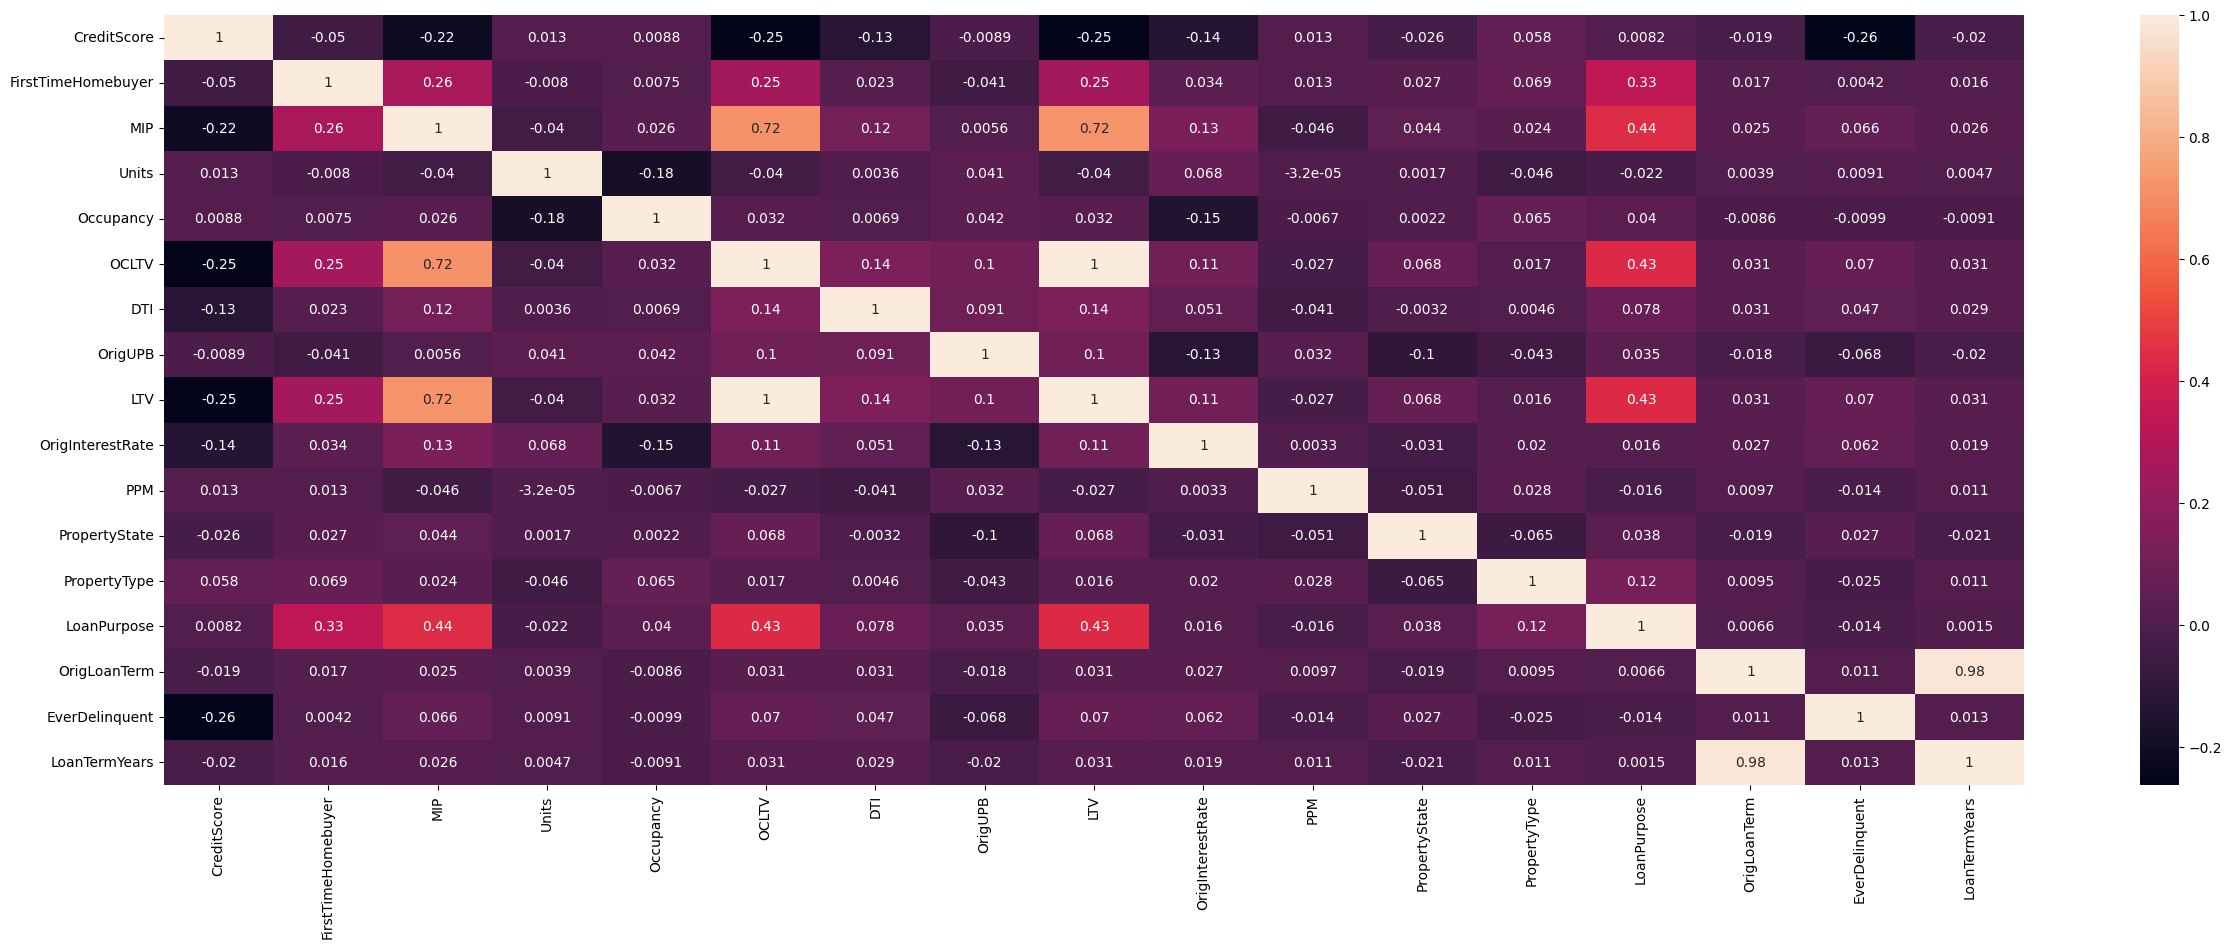

In [ ]:
# check correlation between all features using heat map
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(), annot =True)
plt.show()

**NewData**

In [ ]:
new_df = df[['FirstTimeHomebuyer', 'Units', 'Occupancy', 'OrigUPB', 'OrigInterestRate', 'PPM',
       'PropertyState', 'PropertyType', 'LoanPurpose', 'NumBorrowers', 'EverDelinquent', 'CreditRange', 'MIP_Range',
       'DTI_Range', 'LTV_Range', 'LoanTermYears']]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207397 entries, 1189 to 291450
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   FirstTimeHomebuyer  207397 non-null  int64  
 1   Units               207397 non-null  int64  
 2   Occupancy           207397 non-null  int64  
 3   OrigUPB             207397 non-null  int64  
 4   OrigInterestRate    207397 non-null  float64
 5   PPM                 207397 non-null  int64  
 6   PropertyState       207397 non-null  int64  
 7   PropertyType        207397 non-null  int64  
 8   LoanPurpose         207397 non-null  int64  
 9   NumBorrowers        207397 non-null  object 
 10  EverDelinquent      207397 non-null  int64  
 11  CreditRange         207397 non-null  object 
 12  MIP_Range           207397 non-null  object 
 13  DTI_Range           207397 non-null  object 
 14  LTV_Range           207397 non-null  object 
 15  LoanTermYears       207397 non-

In [ ]:
columns_to_convert = ['NumBorrowers', 'CreditRange', 'MIP_Range','DTI_Range','LTV_Range']
for col in columns_to_convert:
    new_df[col] = new_df[col].astype(int)

<ipython-input-59-4fcee2fa613c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].astype(int)


**PCA**

In [ ]:
x = new_df.drop(['EverDelinquent'], axis=1)
y = new_df['EverDelinquent']

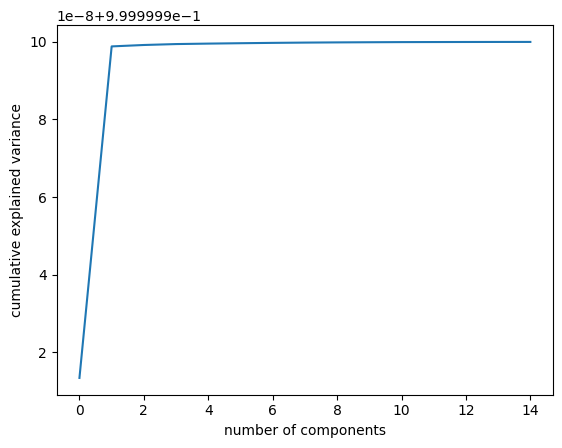

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Define the number of top features to select
N = 6

# Select top N features based on mutual information
selector = SelectKBest(score_func=mutual_info_regression, k=N)
X_selected = selector.fit_transform(x, y)

selected_feature_indices = selector.get_support(indices=True)
selected_features = x.columns[selected_feature_indices].tolist()

In [ ]:
selected_features

['OrigUPB',
 'PropertyState',
 'PropertyType',
 'LoanPurpose',
 'CreditRange',
 'LTV_Range']

In [ ]:
df_selected = pd.DataFrame(X_selected)

In [ ]:
new_data = new_df[['OrigUPB','OrigInterestRate','PropertyState','CreditRange','DTI_Range','LTV_Range','EverDelinquent']]

**VIF**

check potential multicollinearity (VIF>10)

In [ ]:
x1 = new_data.drop(['EverDelinquent'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif_data = pd.DataFrame()
vif_data["Variable"] = x1.columns
vif_data["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
print("VIF values:\n", vif_data)

VIF values:
            Variable        VIF
0           OrigUPB   6.630206
1  OrigInterestRate  22.054759
2     PropertyState   3.089549
3       CreditRange   4.158099
4         DTI_Range   3.361530
5         LTV_Range  10.928464


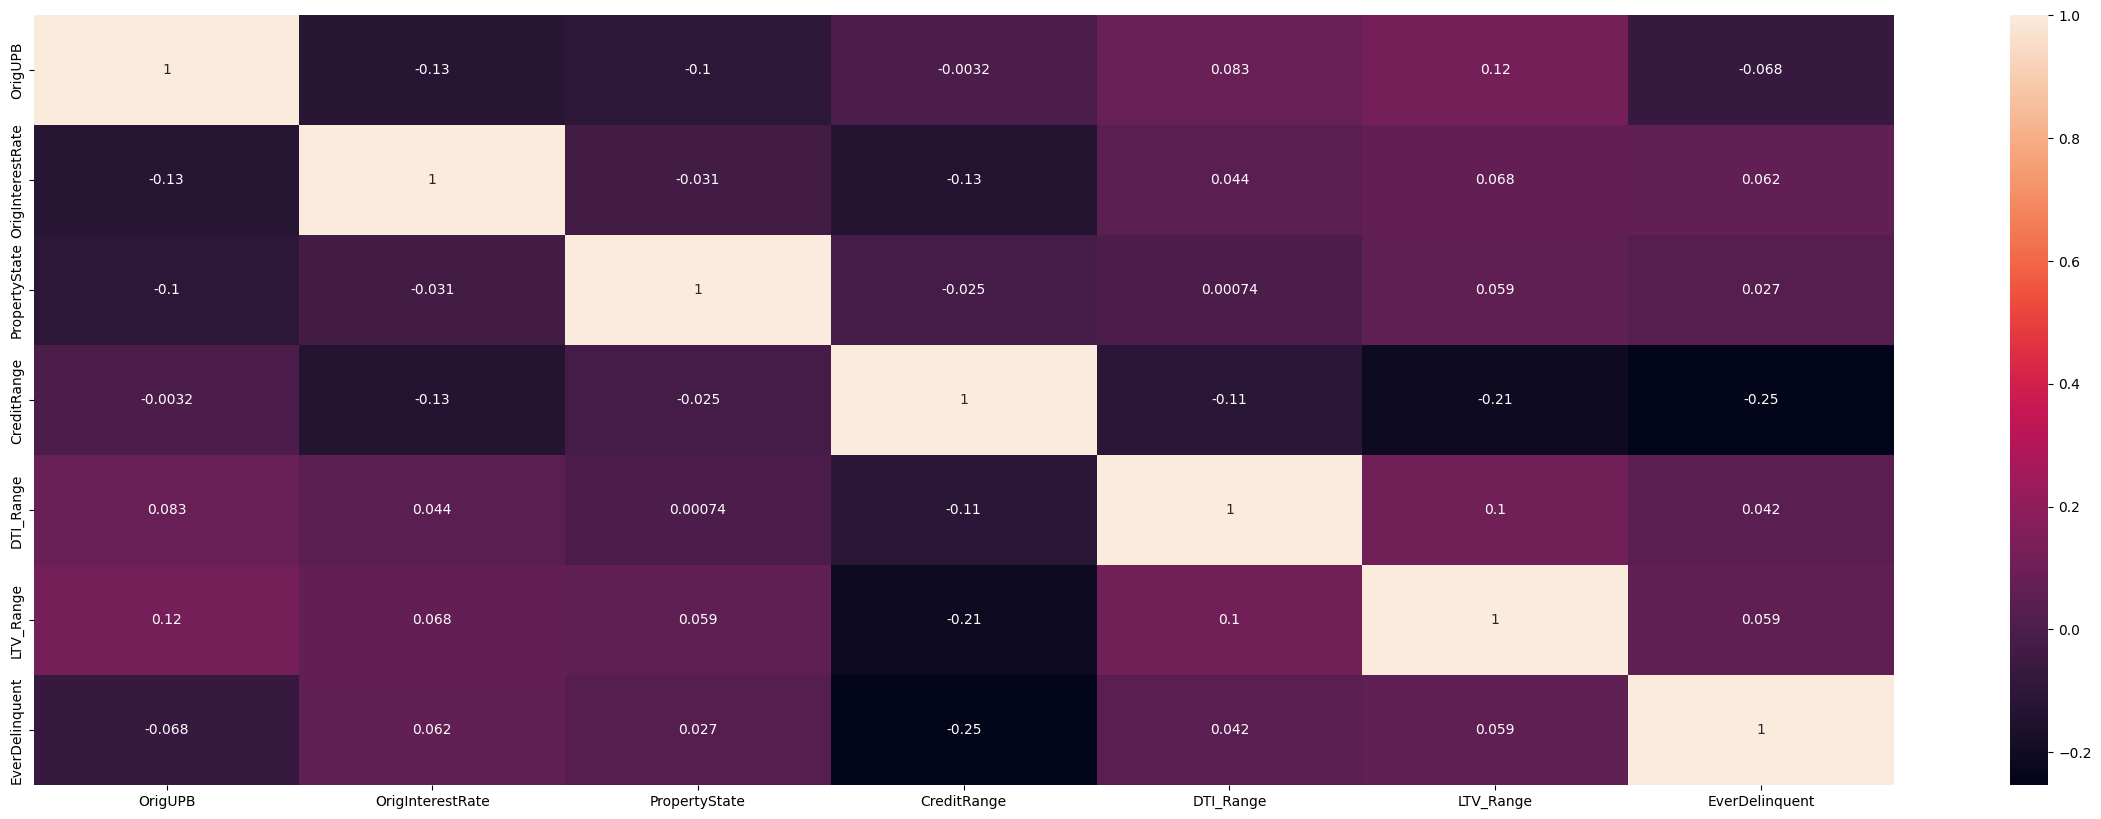

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(new_data.corr(), annot =True)
plt.show()

In [ ]:
new_data.to_csv("new_data.csv", index=False)